## data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_RavdessAudioOnlyFeatures_TRAIN.csv", skipinitialspace=True)
df_test= pd.read_csv("clean_RavdessAudioOnlyFeatures_TEST.csv", skipinitialspace=True)

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder


categorical_cols = ["vocal_channel","emotional_intensity","statement","repetition","sex"]

df = pd.get_dummies(df, columns=categorical_cols)#we get one colum for each categorical attribute class
le = LabelEncoder()
df['emotion_val']= le.fit_transform(df['emotion'])
y_train=np.array(df['emotion_val'])
df.drop(['emotion_val','emotion'],inplace=True, axis=1)
X_train=df.values

print(le.classes_)#0 for angry,1 for calm,2 for disgust,3 for fearful,4 for happy,5 for neutral,6 for sad,7 for surprised

df_test = pd.get_dummies(df_test, columns=categorical_cols)
df_test['emotion_val']= le.fit_transform(df_test['emotion'])
y_test=np.array(df_test['emotion_val'])
df_test.drop(['emotion_val','emotion'],inplace=True, axis=1)
X_test=df_test.values


print(le.classes_)

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

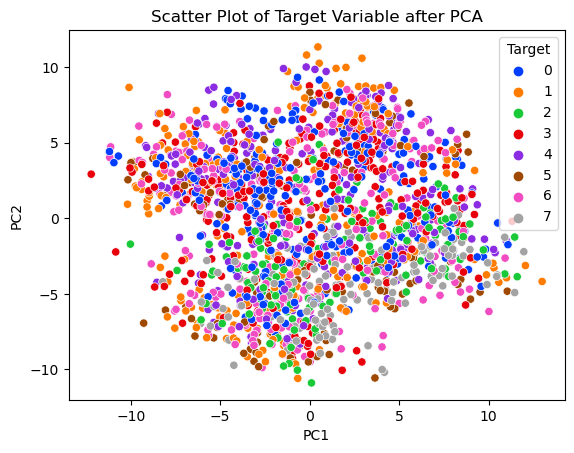

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y_train
sns.scatterplot(x='PC1', y='PC2', hue='Target', palette="bright",data=pca_df)
plt.title('Scatter Plot of Target Variable after PCA')
plt.show()

In [6]:
import statsmodels.api as sm
variable_to_use=[]
for variable in X_train.T:
    X0=sm.add_constant(variable)
    logit_model=sm.Logit(y_train,variable.reshape(-1, 1))
    result=logit_model.fit()
    print(result.summary())
    if model.pvalues[1]<0.05:
        variable_to_use.append(variable)

        
print(variable_to_use)
    

ValueError: endog must be in the unit interval.

In [7]:
from sklearn.feature_selection import SelectKBest
n_Kbest = [3, 6, 10, 13, 15, 18, 20, 25, 30, None]
scores = list()
for K_best in n_Kbest:
    sel = SelectKBest(k=K_best)
    X_train_sel = sel.fit_transform(X_train, y_train)
    dt = LogisticRegression()
    scores.append(cross_val_score(dt, X_train_sel, y_train, cv=7).mean())
plt.plot(scores)
plt.xticks(range(len(n_Kbest)), n_Kbest)
plt.xlabel("n_Kbest")
plt.ylabel("accuracy")
plt.show()

C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

TypeError: '<=' not supported between instances of 'int' and 'NoneType'

# logistic regression

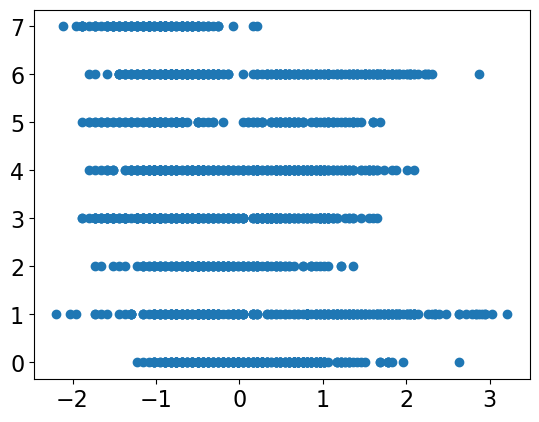

In [5]:
plt.scatter(X_train.T[0], y_train)#cosa c'è sulle x?
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

<AxesSubplot:>

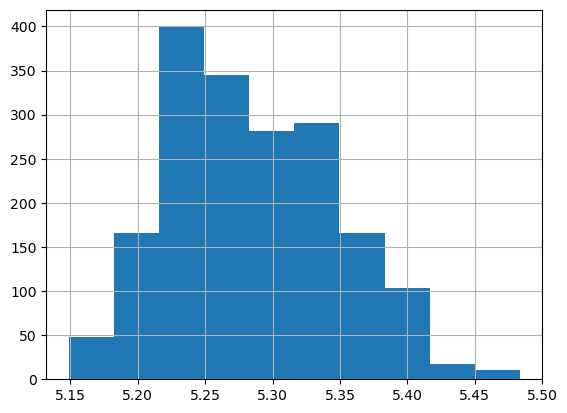

In [6]:
df.iloc[:,0].hist()

In [5]:
#The conventional technique is to first run the univariate analyses 
#(i.e., relation of the outcome with each predictor, one at a time) 
#and then use only those variables which meet a preset cutoff for significance to run a multivariable model.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

pipe = Pipeline([
    ('select', SelectKBest()),
    ('classifier', LogisticRegression())
])

# Set the range of k values to try
param_grid = {
    'select__k': range(1, 129)
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True
)
grid.fit(X_train, y_train)

C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=Pipeline(steps=[('select', SelectKBest()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1, param_grid={'select__k': range(1, 129)})

In [9]:
print(grid.best_params_, grid.best_score_)
grid.best_params_['select__k']

{'select__k': 95} 0.5860550939441574


95

In [10]:
select = grid.best_estimator_.named_steps['select']

# Get a boolean mask of the selected features
selected_features = select.get_support()

# Get the column names of the selected features
selected_columns = df.columns[selected_features]
print(selected_columns)

Index(['frame_count_log', 'kur_log', 'skew', 'zc_sum_log', 'zc_skew_log',
       'mfcc_q75', 'mfcc_q95_log', 'mfcc_kur_log', 'sc_sum', 'sc_mean',
       'sc_std_log', 'sc_q05', 'sc_q25', 'sc_q50_log', 'sc_q75_log',
       'sc_q95_log', 'sc_kur', 'stft_sum', 'zc_q95_w1', 'zc_skew_w1_log',
       'mfcc_sum_w1', 'mfcc_mean_w1', 'mfcc_max_w1', 'mfcc_q01_w1',
       'mfcc_q25_w1', 'mfcc_q99_w1', 'sc_q99_w1', 'stft_kur_w1', 'kur_w2',
       'lag1_kur_w2_log', 'zc_skew_w2_log', 'mfcc_mean_w2', 'mfcc_min_w2',
       'mfcc_max_w2_log', 'mfcc_q01_w2', 'mfcc_q05_w2', 'mfcc_q50_w2',
       'mfcc_q95_w2_log', 'mfcc_q99_w2', 'mfcc_skew_w2', 'sc_sum_w2_log',
       'sc_q01_w2', 'sc_q05_w2', 'sc_q25_w2_log', 'sc_q50_w2_log', 'sc_q75_w2',
       'sc_q95_w2', 'sc_q99_w2', 'sc_skew_w2', 'stft_sum_w2_log', 'kur_w3',
       'lag1_kur_w3_log', 'lag1_skew_w3', 'zc_skew_w3_log', 'mfcc_sum_w3',
       'mfcc_mean_w3', 'mfcc_max_w3_log', 'mfcc_q01_w3', 'mfcc_q05_w3',
       'mfcc_q95_w3', 'mfcc_q99_w3_log', 'mfc

In [11]:
sel = SelectKBest(k=95)
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)


In [12]:
from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C':uniform(1.0, 100),
    'solver': ['newton-cg','sag','saga','lbfgs'],
    'penalty': ['l1', 'l2','elasticnet'],
    'class_weight':['balanced'],
    'warm_start':[True,False]
}# if multiclass If the option chosen is ‘ovr’, then a binary problem is fit for each label.
grid = RandomizedSearchCV(
    LogisticRegression(class_weight='balanced'),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=7,random_state=0),
    n_jobs=-1,
    n_iter=200
)
grid.fit(X_train_sel, y_train)
clf = grid.best_estimator_

C:\Users\matte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9030 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1610 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matte\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError

In [13]:
print(grid.best_params_, grid.best_score_)

{'C': 2.6561369831346817, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True} 0.5873678119137451


In [15]:
print(clf)

LogisticRegression(C=2.6561369831346817, class_weight='balanced',
                   solver='newton-cg', warm_start=True)


In [14]:
clf = clf.fit(X_train_sel,y_train)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.07692307692307693
F1-score [0.         0.         0.         0.         0.         0.
 0.         0.14285714]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        96
           1      0.000     0.000     0.000        96
           2      0.000     0.000     0.000        48
           3      0.000     0.000     0.000        96
           4      0.000     0.000     0.000        96
           5      0.000     0.000     0.000        48
           6      0.000     0.000     0.000        96
           7      0.077     1.000     0.143        48

    accuracy                          0.077       624
   macro avg      0.010     0.125     0.018       624
weighted avg      0.006     0.077     0.011       624



C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(clf.intercept_)
print(clf.coef_)

[-0.87931056  0.59102215 -1.21617145  1.50172237  2.2085433  -1.75590857
  2.11186383 -2.56176108]
[[ 1.63452702e-01  4.52623741e-02  6.20839468e-01  4.62211817e-01
   4.87058571e-01 -8.05540731e-01 -1.14858134e+00  2.05050371e-01
   8.64177274e-02  3.16881487e-02 -1.14330054e+00 -9.24689075e-03
  -4.95089764e-01  1.21842982e+00 -2.60037931e-01  2.95939266e-01
   5.61602377e-02 -2.20333019e-01  3.48843457e-01 -3.30316019e-01
   2.77122085e-01 -2.64824000e-01 -3.10054388e-01  2.73306507e-01
   5.88700893e-01 -3.60601619e-01  9.67292914e-02 -1.67239375e-01
   5.13988138e-01  3.05108304e-01 -1.61376117e+00  5.12491806e-01
   8.23858865e-02  4.34892967e-02  1.08015830e+00 -6.95182520e-01
   3.66347614e-01  1.99639692e-02 -1.74252162e-01 -4.36228583e-01
  -5.21326576e-01 -2.26390798e-01 -4.87598025e-02  3.08198570e-01
  -4.65681151e-01  9.52865111e-02 -2.64711911e-01  1.46503248e-01
   5.86094745e-01 -3.28214566e-01  1.43549444e-01  3.36604755e-01
  -1.43164660e+00 -7.41040777e-01  7.162306

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

clf = LogisticRegression(random_state=0)
clf.fit(X_train.T[0].reshape(-1,1), y_train)

y_pred = clf.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.18108974358974358
F1-score [0.0862069  0.26700252 0.         0.2283737  0.02962963 0.
 0.05217391 0.34      ]
              precision    recall  f1-score   support

           0       0.25      0.05      0.09        96
           1       0.18      0.55      0.27        96
           2       0.00      0.00      0.00        48
           3       0.17      0.34      0.23        96
           4       0.05      0.02      0.03        96
           5       0.00      0.00      0.00        48
           6       0.16      0.03      0.05        96
           7       0.33      0.35      0.34        48

    accuracy                           0.18       624
   macro avg       0.14      0.17      0.13       624
weighted avg       0.15      0.18      0.13       624



C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# support vector machine

# Neural networks